# Homework 5
## ECE204 Data Science & Engineering

*This notebook uses `X` for multiple problems, and that variable may end up being used for the wrong problem. To start fresh, restart the kernel in the Kernel menu or with the <span class="jp-RefreshIcon jp-Icon jp-Icon-16 jp-ToolbarButtonComponent-icon"></span> button above.*

### Import Statements

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

---
**Problem 1.** On the MNIST dataset, **find the number of principle components that are required to explain Y%** (Y is given to you in Canvas) **of the variance.**

In [2]:
data = np.load("mnist.npz")
X = data["X"]
X.shape

(70000, 784)

In [3]:
embedding = PCA()
embedding.fit(X)

culmulative_variance = np.cumsum(embedding.explained_variance_ratio_)
num_components_96 = np.argmax(culmulative_variance >= 0.96) + 1  
num_components_96

np.int64(179)

---
**Problem 2.** Consider the MNIST dataset again. The data shape should indicate there are 70,000 samples with 784 features each. Now suppose we want to reduce the number of dimensions in this dataset by an order of magnitude, and find out how the total explained variance changes going from one case to the next.

Specifically, run PCA independently 3 times on this data reducing the data to 300, 30 and 3 dimensions. Approximately, how much variance is explained by the first 300, 30 and 3 principal components?

In [4]:
data = np.load("mnist.npz")
X = data["X"]

pca_300 = PCA(n_components=300)
pca_300.fit(X)
cum_var = np.cumsum(pca_300.explained_variance_ratio_)
first_300 = np.sum(cum_var[299])
first_300

np.float64(0.986278825686295)

In [5]:
pca_30 = PCA(n_components=30)
pca_30.fit(X)
cum_var = np.cumsum(pca_30.explained_variance_ratio_)
first_30 = np.sum(cum_var[29])
first_30

np.float64(0.7316323070665492)

In [6]:
pca_3 = PCA(n_components=3)
pca_3.fit(X)
cum_var = np.cumsum(pca_3.explained_variance_ratio_)
first_3 = np.sum(cum_var[2])
first_3

np.float64(0.23051091490096484)

---
**Problem 3.** Suppose you have a dataset with a large number of dimensions, and want to perform clustering on it in a lower dimensional space.

On the MNIST dataset, **reduce the number of dimensions to 3 (from 784) using PCA, and then run KMeans clustering on this reduced dataset assuming 10 clusters** since we have the prior knowledge that there are 10 categories of digits in MNIST, 0-9.

**Which cluster centers are obtained through this process?** The cluster centers below are accurate to at least one unit.

`Note:` Set `random_state=42` in both KMeans and PCA. e.g., `PCA(n_components=x, random_state=42)`. This is similar to setting a random seed.



In [7]:
data = np.load("mnist.npz")
X = data["X"]
X.shape


(70000, 784)

In [18]:
pca_3 = PCA(n_components=3, random_state=42)
X_pca_3 = pca_3.fit_transform(X)
# print(X_pca_3.shape)
km = KMeans(n_clusters=10, random_state=42).fit(X_pca_3)
km.cluster_centers_

array([[-7.80689195e+02, -8.86657986e-01,  4.24920405e+00],
       [ 9.39201315e+02,  8.60396353e+00, -7.68294849e+00],
       [ 2.09278365e+02,  3.62859314e+00, -1.51014175e+01],
       [ 1.35170953e+03,  1.02038524e+01,  8.40188291e+00],
       [-4.48649582e+02, -1.09156877e+01,  6.01156432e+00],
       [-1.18703372e+03,  2.54858955e+01, -6.33689770e+00],
       [ 1.82627803e+03, -1.61617907e+01,  9.14927213e+00],
       [ 5.33260005e+02,  5.30908991e+00, -7.22213815e+00],
       [-9.87500368e+02,  7.76148227e+00, -2.36575998e+00],
       [-1.23264977e+02, -1.81770068e+01,  4.59521996e+00]])

---
**Problem 4.**
1. Perform PCA on the data (`X`) in `synthetic1.csv` with `n_components=1`. <br>
2. Now, get the inverse transform on the transformed data to reconstruct your input to it's original dimensions. Let's call this reconstructed data `X_hat`. <br>

**For sanity check**: What shape is the data in `X`, and what is the shape of `X_hat` = inverse_transform(fit_transform(X))? Ideally, `X_hat` should be similar to `X`.

**Mark all answers that are true.** <br>

`NOTE:` To visualize the data, make a scatter plot.

In [9]:
df_s1 = pd.read_csv("synthetic1.csv")

# Use X for PCA 
X = df_s1.values
print("Shape of X:", X.shape)

df_s1.head()

Shape of X: (400, 2)


,x0,x1
0,0.155579,-0.061002
1,0.800925,-0.673015
2,-0.160963,0.184892
3,-0.255417,-0.102550
4,-0.287911,0.106978


Shape of X_hat: (400, 2)


<Axes: title={'center': 'X_hat'}, xlabel='x', ylabel='y'>

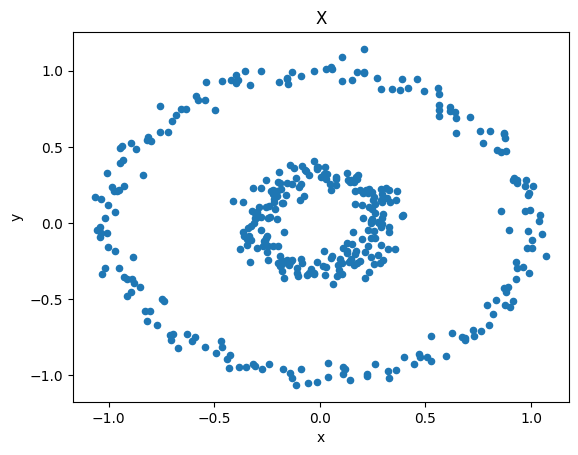

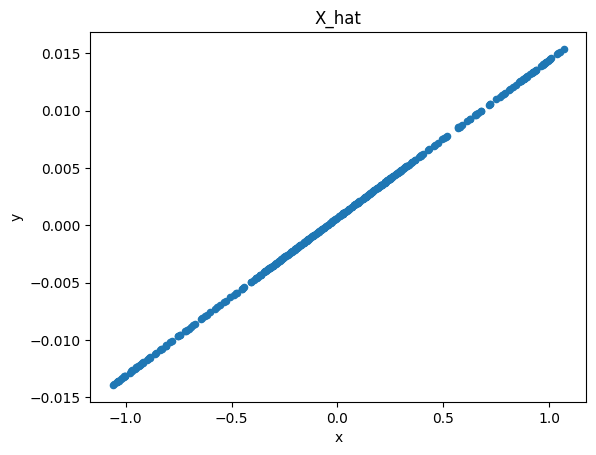

In [10]:
pca_1 = PCA(n_components=1)
X_pca_1 = pca_1.fit_transform(X)

X_df = pd.DataFrame(X, columns=['x', 'y'])
X_df.plot.scatter(x=0, y=1, title='X')

X_hat = pca_1.inverse_transform(X_pca_1)
print("Shape of X_hat:", X_hat.shape)
X_hat_df = pd.DataFrame(X_hat, columns=['x', 'y'])
X_hat_df.plot.scatter(x=0, y=1, title='X_hat')

---
**Problem 5. Which feature in `cars.csv` has the variance with the highest numerical value?**


In [11]:
df_cars = pd.read_csv("cars.csv")
df_cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Weight_in_lbs
0,12.0,8,307.0,130.0,18.0,3504
1,11.5,8,350.0,165.0,15.0,3693
2,11.0,8,318.0,150.0,18.0,3436
3,12.0,8,304.0,150.0,16.0,3433
4,10.5,8,302.0,140.0,17.0,3449


In [12]:
df_cars.var()

Acceleration             7.611331
Cylinders                2.909696
Displacement         10950.367554
Horsepower            1481.569393
Miles_per_Gallon        60.918142
Weight_in_lbs       721484.709008
dtype: float64

---
**Problem 6.** Perform PCA on the `cars.csv` dataset, and find 6 principal components. The data can be transformed by PCA into 6 dimensions. <br>
Now, perform the inverse transform on the transformed data (e.g., `X_hat = inverse_transform(transform(X))`).

**Is the approximation `X_hat` equal to the original data `X`, and why?**

`NOTE:` To check if they are same, we can just subtract the two vectors and find the absolute sum. Round the sum to 2 decimal place and check if its 0.0. If this sum is zero, we'll know that they are same.

In [13]:
df_cars = pd.read_csv("cars.csv")
X = df_cars.values
X.shape

(392, 6)

In [14]:
pca_6 = PCA(n_components=6)
X_low = pca_6.fit_transform(X)
X_hat = pca_6.inverse_transform(X_low)
diff = np.abs(X - X_hat).sum()
round(diff, 2)

np.float64(0.0)

---
**Problem 7.** Import the data in the `cars.csv` dataset.

`Part 1` Find the number of principle components required to explain Y% (Y is given to you in Canvas) of the variance.<br>

`Part 2` Standardize the original data using [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Now find the number of principle components required to explain Y% of the variance.

**Does standardizing the data change the number of principal components required to explain Y% of the variance in Parts I and II? If so, please elaborate on why. If not, does this result match your expectations?**

In [15]:
df_cars = pd.read_csv("cars.csv")
X = df_cars.values
df_cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Weight_in_lbs
0,12.0,8,307.0,130.0,18.0,3504
1,11.5,8,350.0,165.0,15.0,3693
2,11.0,8,318.0,150.0,18.0,3436
3,12.0,8,304.0,150.0,16.0,3433
4,10.5,8,302.0,140.0,17.0,3449


In [16]:
# Part 1 
pca_97 = PCA(n_components=0.97)
pca_97.fit(X)
pca_97.n_components_

np.int64(1)

In [17]:
# Part 2 
scaler = StandardScaler()
X_scalered = scaler.fit_transform(X)
pca_97.fit(X_scalered)
pca_97.n_components_

np.int64(4)

---